In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
class Graph:
    def __init__(self):
        self.adjlist = dict()
        self.g = nx.Graph()
        
    def addedge(self, u, v):
        if u in self.adjlist:
            self.adjlist[u].append(v)
        else:
            self.adjlist[u] = [v]
        
        if v in self.adjlist:
            self.adjlist[v].append(u)
        else:
            self.adjlist[v] = [u]
            
        self.g.add_edge(u, v, weight=1)
        
    def visualize(self): 
        pos = nx.kamada_kawai_layout(self.g)
        nx.draw(self.g, pos=pos, with_labels=True, alpha=0.8)
        plt.show()

In [3]:
class PQueue:
    def __init__(self):
        self.queue = []
        
    def isEmpty(self):
        return len(self.queue) == 0
    
    def enqueue(self, ele, pri):
        self.queue.append((ele, pri))
    
    def dequeuemin(self):
        if self.isEmpty():
            return None, None
        
        self.queue.sort(key=lambda x:x[1])
        
        ele, pri = self.queue.pop(0)
        
        return ele, pri
    
    def dequeuemax(self):
        if self.isEmpty():
            return None, None
        
        self.queue.sort(key=lambda x:x[1])
        
        ele, pri = self.queue.pop(-1)
        
        return ele, pri

In [4]:
def heuristic(n):
    return n**2

def hillclimbsearch(graph, start):
    curr = start
    currheu = heuristic(start)
    
    while True:
        children = graph.adjlist[curr]
        
        q = PQueue()
        for child in children:
            q.enqueue(child, heuristic(child))
            
        child, heu = q.dequeuemin()
        
        if heu < currheu:
            curr = child
            currheu = heu
        else:
            return curr

P:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


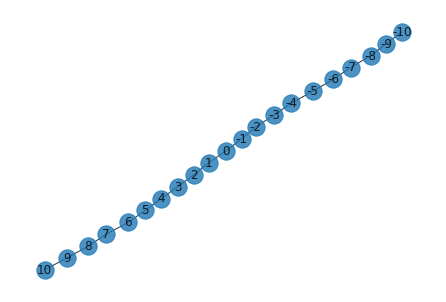

In [5]:
g = Graph()

for i in range(-9, 11):
    g.addedge(i, i-1)
    
g.visualize()

In [6]:
start = -2

minnode = hillclimbsearch(g, start)

print(f"The node with minimum value for f(x) is {minnode} from {start}.")

The node with minimum value for f(x) is 0 from -2.
